[833, 1666, 2499]


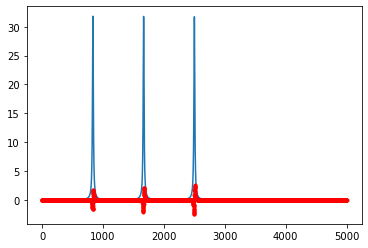

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pulse(gamma, rho, x):
    return np.divide(gamma, np.power(x-rho,2) + gamma*gamma)/np.pi

def find_all_pulses(pulse_train, fraction, one_pulse):
    width = len(one_pulse)
    initial_energy = np.sum(np.power(pulse_train,2))
    pulses_removed = pulse_train.copy()
    pulse_positions = []
    while (np.sum(np.power(pulses_removed,2)) > initial_energy*fraction) and (max(pulses_removed) > fraction*max(centered_pulse)):
        peak_location = np.argmax(pulses_removed)
        pulse_positions.append(peak_location)
        indices = peak_location + list(range(-int(width/2), int(width/2)))
        pulses_removed[indices] = pulses_removed[indices] - one_pulse
        
    return pulse_positions, pulses_removed

N = 5000
x = np.linspace(0,6,N)
diff = x[1]-x[0]

x2 = np.linspace(-1,1,int(2/diff))
pulse_width = len(x2)
half_pulse_width = 500

centered_pulse = pulse(0.01,0,x2)
noiseless_pulses = pulse(0.01,1,x) + pulse(0.01,2,x) + pulse(0.01,3,x)

pulse_locations, removed_pulse_signal = find_all_pulses(noiseless_pulses.copy(), 0.1, centered_pulse)

print(pulse_locations)

plt.plot(noiseless_pulses)
plt.plot(removed_pulse_signal, 'r.')